# Predicciones
Predicciones realizadas con el mejor modelo obtenido.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL

2022-11-26 01:40:29.931257: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-26 01:40:30.018152: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-26 01:40:30.018168: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-26 01:40:30.034282: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-26 01:40:30.549133: W tensorflow/stream_executor/platform/de

In [2]:
model = tf.keras.models.load_model('modelo_entrenado/emociones_anime_model/')
model.summary()

2022-11-26 01:40:31.605680: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 01:40:31.605832: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-26 01:40:31.605864: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-26 01:40:31.605889: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-26 01:40:31.605914: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 3)         0         
                                                                 
 rescaling_62 (Rescaling)    (None, 64, 64, 3)         0         
                                                                 
 conv2d_282 (Conv2D)         (None, 64, 64, 64)        3136      
                                                                 
 max_pooling2d_247 (MaxPooli  (None, 32, 32, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_283 (Conv2D)         (None, 32, 32, 64)        65600     
                                                                 
 max_pooling2d_248 (MaxPooli  (None, 16, 16, 64)       0         
 ng2D)                                               

In [6]:
def predict(model, path):
    class_names = ['Alegria', 'Asco', 'Enojo', 'Miedo', 'Sorpresa', 'Tristeza']
    
    img = tf.keras.utils.load_img(
        path, target_size=(64, 64)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    plt.imshow(img_array[0].numpy().astype("uint8"))

    print(
        "El estado de animo es {} con un {:.2f} porciento de confianza."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

## Ejemplos

1/1 [==============================] - 0s 17ms/step
El estado de animo es Alegria con un 60.48 porciento de confianza.


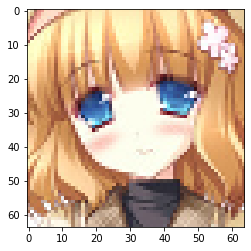

In [7]:
predict(model, '/home/alt9193/Documents/IA/Modulo_DeepLearning/data/test/Alegria/111.png')

1/1 [==============================] - 0s 18ms/step
El estado de animo es Alegria con un 48.63 porciento de confianza.


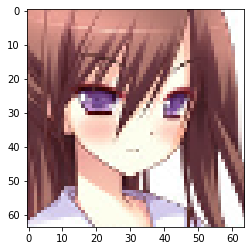

In [9]:
predict(model, '/home/alt9193/Documents/IA/Modulo_DeepLearning/data/test/Enojo/122.png')

1/1 [==============================] - 0s 20ms/step
El estado de animo es Alegria con un 44.33 porciento de confianza.


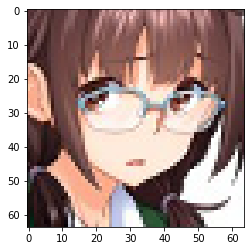

In [10]:
predict(model, '/home/alt9193/Documents/IA/Modulo_DeepLearning/data/test/Miedo/21403.png')

1/1 [==============================] - 0s 14ms/step
El estado de animo es Alegria con un 61.65 porciento de confianza.


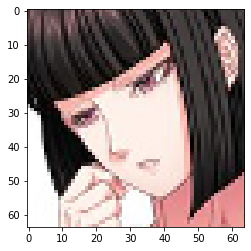

In [11]:
predict(model, '/home/alt9193/Documents/IA/Modulo_DeepLearning/data/test/Tristeza/21391.png')